PASO -1: Agregar las bibliotecas requeridas
Las siguientes bibliotecas se utilizan en el código. Si no están disponibles, se pueden descargar fácilmente a través de sus respectivos sitios web.

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

PASO -2: Establecer semilla aleatoria
Esto se utiliza para reproducir el mismo resultado cada vez si el script se mantiene constante; de lo contrario, cada ejecución producirá resultados diferentes. La semilla se puede establecer en cualquier número.

In [2]:
np.random.seed(500)

PASO -3: Agregar el Corpus
El dataset se puede agregar fácilmente como DataFrame de pandas con la ayuda de la función "read_csv"
La codificación se ha configurado en "latin-1" ya que el texto tiene muchos caracteres especiales.

In [3]:
Corpus = pd.read_csv("corpus.csv",encoding='latin-1')

Se imprime el inicio y final del dataframe para visualizar los datos

In [4]:
Corpus.head()

,text,label
0,Stuning even for the non-gamer: This sound tr...,__label__2
1,The best soundtrack ever to anything.: I'm re...,__label__2
2,Amazing!: This soundtrack is my favorite musi...,__label__2
3,Excellent Soundtrack: I truly like this sound...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After H...",__label__2


In [5]:
Corpus.tail()

,text,label
9995,A revelation of life in small town America in...,__label__2
9996,Great biography of a very interesting journal...,__label__2
9997,Interesting Subject; Poor Presentation: You'd...,__label__1
9998,Don't buy: The box looked used and it is obvi...,__label__1
9999,Beautiful Pen and Fast Delivery.: The pen was...,__label__2


PASO -4: Preprocesamiento de datos

Este es un paso importante en cualquier proceso de minería de datos. Básicamente, esto implica transformar los datos en bruto en un formato comprensible para los modelos de PNL. Los datos del mundo real a menudo son incompletos, inconsistentes y / o carecen de ciertos comportamientos o tendencias, y es probable que contengan muchos errores. El preprocesamiento de datos es un método comprobado para resolver estos problemas. Esto ayudará a obtener mejores resultados a través de los algoritmos de clasificación.

Las técnicas que se utilizan en este ejemplo son el tokenizado y stemming y lemmatization.

Tokenización: este es un proceso de dividir una secuencia de texto en palabras, frases, símbolos u otros elementos significativos llamados tokens. La lista de tokens se convierte en entrada para su posterior procesamiento. NLTK Library tiene word_tokenize y sent_tokenize para dividir fácilmente una secuencia de texto en una lista de palabras u oraciones, respectivamente.

Word Stemming/Lemmatization: el objetivo de ambos procesos es el mismo, reduciendo las formas de inflexión de cada palabra en una base o raíz común. La lematización está estrechamente relacionada con la derivación. La diferencia es que un stemmer opera en una sola palabra sin conocimiento del contexto, y por lo tanto no puede discriminar entre palabras que tienen diferentes significados dependiendo de parte del discurso. Sin embargo, los stemmers suelen ser más fáciles de implementar y ejecutar más rápido, y aunque la precisión puede estar reducida puede no importar para algunas aplicaciones.

In [6]:
# Comenzamos por eliminar los registros vacíos si es que existen.
Corpus['text'].dropna(inplace=True)

In [7]:
# Cambiar todo el texto a minúsculas.
Corpus['text'] = [entry.lower() for entry in Corpus['text']]

In [8]:
# Se visualizan los resultados de los pasos anteriores
Corpus.head()

,text,label
0,stuning even for the non-gamer: this sound tr...,__label__2
1,the best soundtrack ever to anything.: i'm re...,__label__2
2,amazing!: this soundtrack is my favorite musi...,__label__2
3,excellent soundtrack: i truly like this sound...,__label__2
4,"remember, pull your jaw off the floor after h...",__label__2


In [9]:
Corpus.tail()

,text,label
9995,a revelation of life in small town america in...,__label__2
9996,great biography of a very interesting journal...,__label__2
9997,interesting subject; poor presentation: you'd...,__label__1
9998,don't buy: the box looked used and it is obvi...,__label__1
9999,beautiful pen and fast delivery.: the pen was...,__label__2


In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jumunoz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# Se tokeniza por palabras cada una de las entradas del corpus
Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]

In [12]:
Corpus.head()

,text,label
0,"[stuning, even, for, the, non-gamer, :, this, ...",__label__2
1,"[the, best, soundtrack, ever, to, anything, .,...",__label__2
2,"[amazing, !, :, this, soundtrack, is, my, favo...",__label__2
3,"[excellent, soundtrack, :, i, truly, like, thi...",__label__2
4,"[remember, ,, pull, your, jaw, off, the, floor...",__label__2


In [13]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jumunoz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jumunoz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jumunoz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
#Se eliminan las stopwords,y se hace el Stemming y Lemmatization
#Para el lemmatization se requiere del pos_tagging para determinar si una palabra es pronombre, verbo, adjetivo,
#etc

for index, entry in enumerate(Corpus['text']):

    # Se declara una lista vacía para almacenar las palabras finales (después de la limpieza)
    Final_words = []

    # Se inicializa el WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()

    for word in entry:

        # La siguiente condición filtra las stopwords y considera solo los tokens alfabéticos
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word)
            Final_words.append(word_Final)

    # El conjunto final de palabras procesadas se almacena en 'text_final'

    Corpus.loc[index,'text_final'] = str(Final_words)

Se imprime una muestra del resultado del proceso anterior

In [15]:
Corpus.head()

,text,label,text_final
0,"[stuning, even, for, the, non-gamer, :, this, ...",__label__2,"['stuning', 'even', 'sound', 'track', 'beautif..."
1,"[the, best, soundtrack, ever, to, anything, .,...",__label__2,"['best', 'soundtrack', 'ever', 'anything', 're..."
2,"[amazing, !, :, this, soundtrack, is, my, favo...",__label__2,"['amazing', 'soundtrack', 'favorite', 'music',..."
3,"[excellent, soundtrack, :, i, truly, like, thi...",__label__2,"['excellent', 'soundtrack', 'truly', 'like', '..."
4,"[remember, ,, pull, your, jaw, off, the, floor...",__label__2,"['remember', 'pull', 'jaw', 'floor', 'hearing'..."


PASO -5: Se preparan los datasets de entrenamiento y prueba
    
El Corpus se divide en dos datasets, entrenamiento y Prueba. El dataset de entrenamiento se usa para ajustarse el modelo y las predicciones se realizarán en el dataset de prueba.
Esto se puede hacer a través de train_test_split de la biblioteca de sklearn.
Los datos de entrenamiento tendrán el 70% del corpus y los datos de prueba tendrán el 30% restante, ya que hemos establecido el parámetro test_size = 0.3.

In [18]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['label'],test_size=0.3)

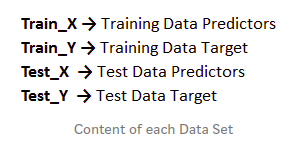

PASO -6: Codificación

Se codifican las etiquetas de clase: esto se hace para transformar los datos categóricos de tipo de cadena
en un conjunto de datos con valores numéricos para que el modelo los pueda entender.

In [19]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Se imprime el resultado de este proceso

In [20]:
Train_Y, Test_Y

(array([1, 0, 0, ..., 0, 1, 1]), array([0, 0, 0, ..., 1, 1, 0]))

PASO -7: Vectorización de palabras
    
Es el proceso general de convertir una colección de documentos de texto en vectores de características numéricas.
Existen muchos métodos para convertir datos de texto en vect "Term Frequency — Inverse Document Frequency ",
que son los componentes de las puntuaciones resultantes asignadas a cada palabra.

Term Frequency: Esto resume la frecuencia con la que aparece una palabra determinada dentro de un documento.
    
Inverse Document Frequency: Esta baja la escala de las palabras que aparecen mucho en los documentos.

TF-IDF son puntuaciones de frecuencia que intentan resaltar palabras que son más interesantes, por ejemplo, frecuentes en un documento pero no entre documentos.

Se construye un vocabulario de palabras aprendidas del corpus con 5 mil palabras únicas cada una considerada como una característica a las que se les asigna un número entero único.

Finalmente el conjunto de Train_X y Test_X se convierten en vectores

In [21]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

Se imprime el vocabulario para visualizarlo

In [22]:
print(Tfidf_vect.vocabulary_)

{'even': 1495, 'sound': 4127, 'track': 4562, 'beautiful': 364, 'paint': 3128, 'mind': 2816, 'well': 4861, 'would': 4951, 'recomend': 3561, 'people': 3192, 'hate': 2049, 'video': 4760, 'game': 1851, 'music': 2895, 'played': 3266, 'cross': 1005, 'ever': 1499, 'best': 409, 'back': 307, 'away': 298, 'crude': 1009, 'take': 4373, 'step': 4212, 'guitar': 1999, 'orchestra': 3068, 'impress': 2221, 'anyone': 184, 'care': 616, 'listen': 2605, 'soundtrack': 4130, 'anything': 185, 'reading': 3531, 'lot': 2654, 'review': 3702, 'saying': 3824, 'figured': 1669, 'write': 4959, 'disagree': 1211, 'bit': 431, 'ultimate': 4643, 'masterpiece': 2740, 'timeless': 4507, 'listening': 2609, 'year': 4979, 'beauty': 366, 'simply': 4010, 'refuse': 3586, 'price': 3374, 'tag': 4372, 'pretty': 3369, 'must': 2901, 'say': 3823, 'going': 1922, 'buy': 576, 'cd': 652, 'much': 2886, 'money': 2850, 'one': 3047, 'feel': 1648, 'worth': 4947, 'every': 1501, 'penny': 3191, 'amazing': 142, 'favorite': 1634, 'time': 4506, 'hand': 

Se imprimen los datos en el vector Train_X_Tfidf
La primera columna corresponde al número en Train_X_Tfidf.
La segunda columna es el número entero único para cada palabra
La tercera columna es el peso de cada palabra

In [23]:
print(Train_X_Tfidf)

  (0, 4507)	0.3486470899659668
  (0, 4506)	0.13918161943006
  (0, 3967)	0.37450229430769727
  (0, 3873)	0.23301952003183105
  (0, 3841)	0.24949404180102433
  (0, 3728)	0.3529096795591593
  (0, 3624)	0.37232836223976784
  (0, 3528)	0.28693298387879335
  (0, 2901)	0.2127938139418236
  (0, 1495)	0.16459753118279385
  (0, 501)	0.29744815685881976
  (0, 473)	0.11398858016925568
  (0, 411)	0.17739337914626235
  (0, 224)	0.22685101941798666
  (1, 4693)	0.36584399356569
  (1, 4068)	0.6228063984086468
  (1, 3403)	0.3640459393772947
  (1, 2584)	0.3819779071979273
  (1, 1234)	0.3737138995394454
  (1, 576)	0.16573467732453828
  (1, 491)	0.1808417344859992
  (2, 4738)	0.19858812659986624
  (2, 4635)	0.16278260362265232
  (2, 4465)	0.11118883418444593
  (2, 4192)	0.12721108994587332
  :	:
  (6998, 2615)	0.16255993820309536
  (6998, 2564)	0.15269285526358803
  (6998, 2560)	0.13036177467776944
  (6998, 2502)	0.12358899725464935
  (6998, 2115)	0.1431610046272704
  (6998, 1964)	0.07608477545662391
  (69

Paso -8: Se utilizan los algoritmos de Machine Learning para predecir la salida

In [24]:
# Se ajusta el dataset de entrenamiento con el algoritmo de Clasificación de Naive Bayes
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# Se hace la predicción
predictions_NB = Naive.predict(Test_X_Tfidf)
# Se calcula el accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  83.6


In [25]:
# Se ajusta el dataset de entrenamiento con el algoritmo de Clasificación de SVM

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# Se hace la predicción
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Se calcula el accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  85.06666666666666
